In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
imgs = search_images_ddg('grizzly bear')
len(imgs)

200

In [5]:
imgs[:5]

(#5) ['https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg','https://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizzly-Bear-7.jpg','https://www.washingtonpost.com/resizer/Wp-GwtBvso2SGSF6e1onmJ0qTAI=/arc-anglerfish-washpost-prod-washpost/public/F4BLJMVM6RAYLK5R3DGQTVZIUM.jpg','https://wallpaperset.com/w/full/2/4/3/49392.jpg','https://media.spokesman.com/photos/2014/09/15/jj-Grizzly_MT.jpg']

In [6]:
dest = 'images/grizzly.jpg'
download_url(imgs[0], dest=dest)

Path('images/grizzly.jpg')

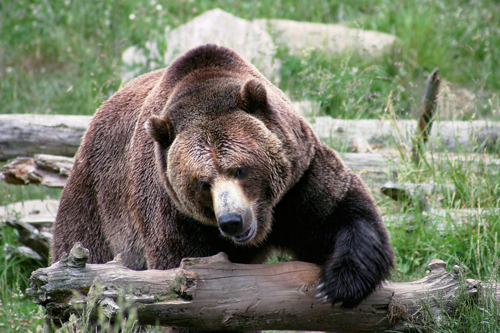

In [8]:
im = Image.open(dest)
im.to_thumb(500, 500)

In [17]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [23]:
path

Path('bears')

In [24]:
for bear_type in bear_types:
    dest = (path/bear_type) # Create a Path for each bear type
    dest.mkdir(exist_ok=True) # like mkdir -p
    print(bear_type, dest.exists())
    results = search_images_ddg(f'{bear_type} bear')
    download_images(dest, urls=results)

grizzly True
black True
teddy True


In [25]:
list(path.glob('**/*'))

[Path('bears/grizzly'),
 Path('bears/black'),
 Path('bears/teddy'),
 Path('bears/grizzly/d27a8b7f-1a98-42cd-9b15-5727d805fcdd.jpg'),
 Path('bears/grizzly/fd0df054-51f7-4e20-8a25-65ad30a46e3f.jpg'),
 Path('bears/grizzly/933a0364-2a07-4b15-868b-6a4059d35b5e.jpg'),
 Path('bears/grizzly/3ecaa17e-d5e0-4f92-8231-9137cddd05d9.jpg'),
 Path('bears/grizzly/047f080f-c587-4400-b2eb-1fc378ff34e4.jpg'),
 Path('bears/grizzly/c54238b8-8977-446d-939f-f3feb36d5951.jpg'),
 Path('bears/grizzly/1c6a1242-19cf-4f67-ba32-7b069f0959ba.jpg'),
 Path('bears/grizzly/b8499965-e610-40f3-b7de-547617b56470.jpg'),
 Path('bears/grizzly/1d794479-039c-41ed-96ab-e1f8ea981d43.jpg'),
 Path('bears/grizzly/caee5bfe-9098-44bc-9af8-cdf1aa59f566.jpg'),
 Path('bears/grizzly/4d299ac3-86c4-4e25-825a-034f279cc020.jpg'),
 Path('bears/grizzly/1b68a9bc-c7c2-4591-adf3-ed54bb217185.jpg'),
 Path('bears/grizzly/0141709f-ade3-4c3a-a81f-c2e65b133fb4.jpg'),
 Path('bears/grizzly/d256716e-836d-48dd-8c44-ac74fa245f5d.jpg'),
 Path('bears/grizzly/f

In [33]:
failed = verify_images(path.glob('**/*.jpg'))

In [29]:
len(failed)

5

In [30]:
failed.map(Path.unlink);

In [32]:
verify_images(list(path.glob('**/*.jpg'))) # Verify again

(#0) []

In [34]:
# Create our DataLoaders object.
# To create a DataLoaders object, we need to tell
# fastai at least 4 things:
# What kinds of data we are working with
# How to get the list of items
# How to label these items
# How to create the validation set
dls_1 = DataLoaders.

(#0) []

In [39]:
# This command has given us a DataBlock object. This is like a template for creating a DataLoaders.
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Our independent variables are images, and our dependent variables are the categories.
    get_items=get_image_files, # How to get the list of files (i.e images)
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Split our data 80% Train, 20% Valid in a random way
    get_y=parent_label, # We are telling fastai what function to call to create the labels in our dataset
    item_tfms=Resize(128) # Resize our images bc they are all of different sizes -> this is a problem for Deep Learning
)

In [40]:
parent_label(Path('bears/teddy/17501b2d-8f2b-496f-a2ec-5c35a598b7c1.jpg'))

'teddy'

In [43]:
# We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:
dls = bears.dataloaders(path)

In [42]:
%debug

> /tmp/ipykernel_1069/4050587283.py(2)<cell line: 2>()
      1 # We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:
----> 2 dls = bears.datalpaders(path)



ipdb>  datalpaders


*** NameError: name 'datalpaders' is not defined


ipdb>  dls


*** NameError: name 'dls' is not defined


ipdb>  bears.datalpaders


*** AttributeError: 'DataBlock' object has no attribute 'datalpaders'
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


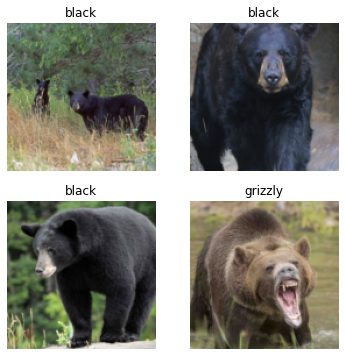

In [47]:
# A DataLoaders includes validation and training DataLoaders.
# DataLoader is a class that provides batches of a few items at a time to the GPU.
# When you loop through a DataLoader fastai will give you 64 (by default) items at a time,
# all stacked up into a single tensor.
# We can take a look at a few of those items by calling the show_batch method on a DataLoader:
dls.valid.show_batch(max_n=4)

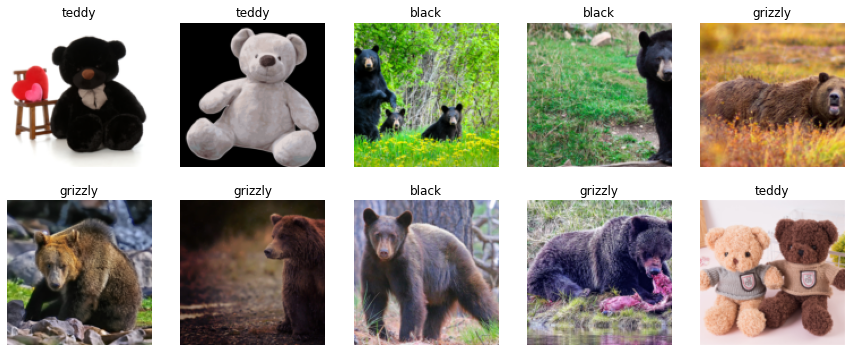

In [49]:
# We can take a look also at the training set
dls.train.show_batch(max_n=10, nrows=2)

By default Resize crops the images to fit a square shape of the size requested,
using the full width or height. This can result in losing some important details.
Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

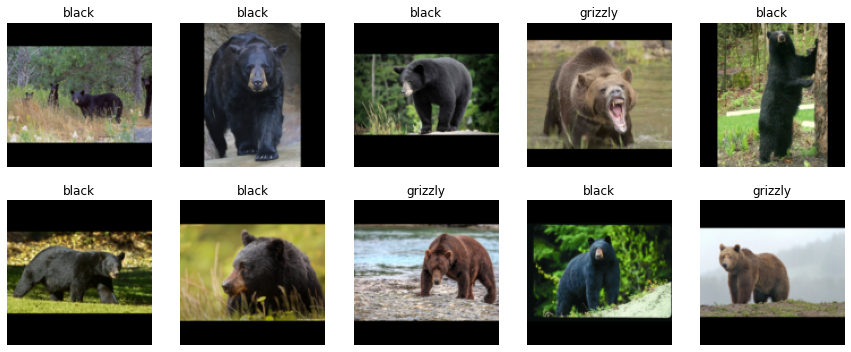

In [52]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

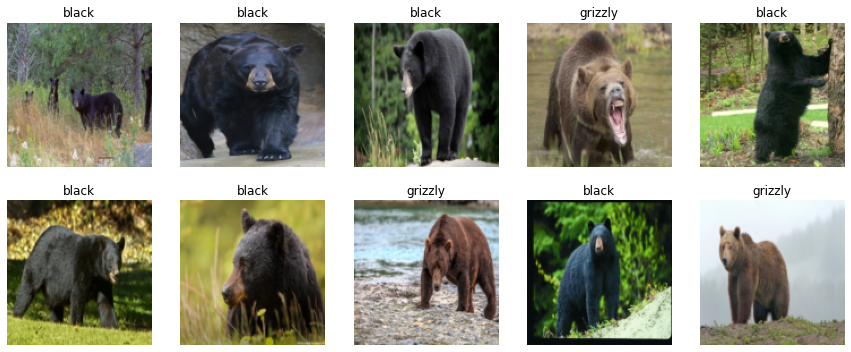

In [53]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes,
leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy.
If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to
recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds.
If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective
resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part.
On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image.
This means that our model can learn to focus on, and recognize, different features in our images.
It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave.
It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing!
So actually training the neural network with examples of images where the objects are in
slightly different places and slightly different sizes helps it to understand the basic concept of what an object is,
and how it can be represented in an image.

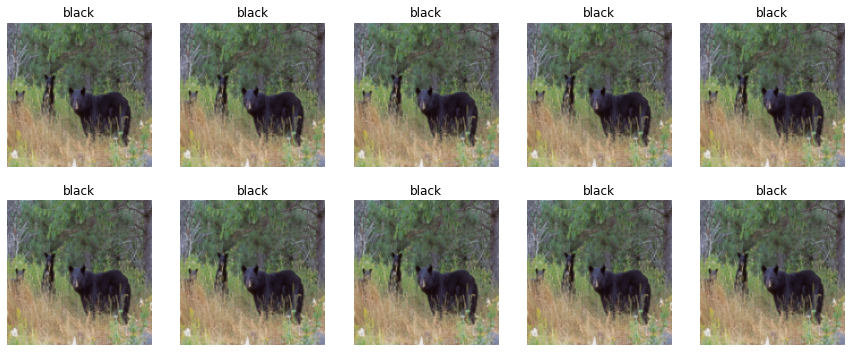

In [65]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2, unique=True)